In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib.pyplot as plt
from metal.contrib.slicing.synthetics.geometric_synthetics import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
POINT_SIZE = 1.0
k = 2

### Create points

In [3]:
canvas = Rectangle(0,10,0,10)
n = 5000

X = create_points(canvas, n, random=False)

### Create labels

In [4]:
Y = np.full(n, k) # default to negative class
# region = Rectangle(3,7,3,7)
# Y = assign_y(X, Y, region, 1)
for i in range(4):
    x, y = X[np.random.choice(range(n)),:]
    a = np.random.uniform(1,3)
    b = np.random.uniform(1,3)
    region = Ellipse(x, y, a, b)
    Y = assign_y(X, Y, region, 1)

In [5]:
def color_me(Y):
    colors = ['k', 'r', 'b', 'g', 'y', 'o']
    return [colors[y] for y in Y]

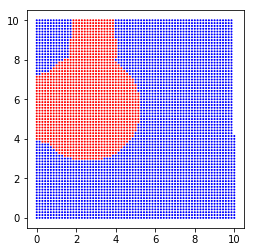

In [6]:
plt.scatter(X[:,0], X[:,1], color=color_me(Y), s=POINT_SIZE)
plt.gca().set_aspect('equal', adjustable='box')

### Create LFs

Create one LF

In [7]:
label_region = Circle(5,4,3)
l = assign_l(X, Y, label_region, props=[0.6, 0.9], accs=[0.75, 0.9])

In [8]:
points, indices = get_points(X, label_region)

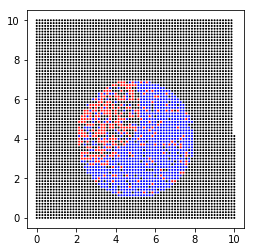

In [9]:
plt.scatter(X[:,0], X[:,1], color=color_me(l), s=POINT_SIZE)
plt.gca().set_aspect('equal', adjustable='box')

Create many LFs

In [10]:
m = 20
R = 3
L = []
accs_hist = []
props_hist = []
regions_hist = []

for j in range(m):
    x, y = X[np.random.choice(range(n)),:]
    r = np.random.uniform(1,5)
    region = Circle(x, y, r)
    props = np.random.uniform(0.5, 0.9, 2)
    accs = np.random.uniform(0.5, 0.9, 2)
    l = assign_l(X, Y, region, props, accs)
    L.append(l)
    
    # bookkeeping
    regions_hist.append(region)
    accs_hist.append(accs)
    props_hist.append(props)

    
regions_hist = np.array(regions_hist)
accs_hist = np.array(accs_hist)
props_hist = np.array(props_hist)
L = np.array(L).transpose()
assert(L.shape[0] == n and L.shape[1] == m)

In [11]:
# for j in range(m):
#     l = L[:,j]
#     plt.scatter(X[:,0], X[:,1], color=color_me(l), s=POINT_SIZE)
#     plt.gca().set_aspect('equal', adjustable='box')
#     plt.show()
#     if j == 5:
#         break

### Create Slices

Create one slice

In [12]:
# slice_region = Circle(3,3,1)
# Z = np.zeros(n)
# Z = assign_y(X, Z, slice_region, 1)

Create many slices

In [13]:
NUM_SLICES = 4
Z = np.zeros(n) # default slice is 0

for i in range(1, NUM_SLICES+1):
    x, y = regions_hist[np.random.choice(range(m))].center()
    a = np.random.uniform(1,2)
    b = np.random.uniform(1,2)
    region = Ellipse(x, y, a, b)
    Z = assign_y(X, Z, region, i)

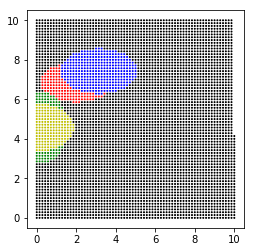

In [14]:
plt.scatter(X[:,0], X[:,1], color=color_me(Z), s=POINT_SIZE)
plt.gca().set_aspect('equal', adjustable='box')

### Analyze Data

In [15]:
from scipy.sparse import csr_matrix
import torch

L = csr_matrix(L)
X = torch.Tensor(X)

In [16]:
from metal.utils import split_data

Ls, Xs, Ys, Zs = split_data(L, X, Y, Z, splits=[0.8, 0.1, 0.1], shuffle=True, seed=123)

In [17]:
from metal.analysis import lf_summary

lf_summary(Ls[1], Ys[1])

,Polarity,Coverage,Overlaps,Conflicts,Correct,Incorrect,Emp. Acc.
0,"[1, 2]",0.274,0.270,0.186,112,25,0.817518
1,"[1, 2]",0.092,0.092,0.064,40,6,0.869565
2,"[1, 2]",0.042,0.042,0.028,16,5,0.761905
3,"[1, 2]",0.146,0.140,0.078,59,14,0.808219
4,"[1, 2]",0.038,0.038,0.028,16,3,0.842105
5,"[1, 2]",0.138,0.122,0.092,35,34,0.507246
6,"[1, 2]",0.290,0.216,0.140,78,67,0.537931
7,"[1, 2]",0.180,0.174,0.108,62,28,0.688889
8,"[1, 2]",0.096,0.096,0.076,40,8,0.833333
9,"[1, 2]",0.014,0.012,0.010,5,2,0.714286


(array([3.990e+02, 1.132e+03, 7.230e+02, 1.067e+03, 2.750e+02, 2.640e+02,
        1.050e+02, 2.200e+01, 1.200e+01, 1.000e+00]),
 array([ 0. ,  1.6,  3.2,  4.8,  6.4,  8. ,  9.6, 11.2, 12.8, 14.4, 16. ]),
 <a list of 10 Patch objects>)

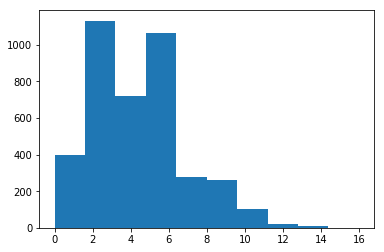

In [18]:
num_votes = Ls[0].sum(axis=1)
plt.hist(num_votes)

# Learn

### LabelModel

In [19]:
# from metal.label_model import LabelModel

# label_model = LabelModel(2)
# label_model.train_model(Ls[0], Y_dev=Ys[1], n_epochs=1000, print_every=100)

In [20]:
# c_probs_est = label_model.get_conditional_probs()
# # err = np.mean(np.abs(data.c_probs - c_probs_est))
# # print(err)
# # c_probs_est.shape

# learned_accs = []
# for i_m in range(m):
#     i = 3 * i_m
#     learned_accs.append([c_probs_est[i+1,0]/sum(c_probs_est[i+1:i+3,0]), 
#                          c_probs_est[i+2,1]/sum(c_probs_est[i+1:i+3,1])])
# learned_accs = np.array(learned_accs)

In [21]:
# err = ((learned_accs - accs_hist)**2).sum()/m
# print(f"Average squared error in conditional accuracies:\n{err}")

In [22]:
# Y_train_ps = label_model.predict_proba(Ls[0])

In [23]:
# score = label_model.score((Ls[1], Ys[1]))

In [24]:
# from metal.contrib.visualization.analysis import (
#     plot_predictions_histogram, 
#     plot_probabilities_histogram,
# )
    
# Y_dev_p = label_model.predict(Ls[1])
# Y_dev_ps = label_model.predict_proba(Ls[1])
# plot_probabilities_histogram(Y_dev_ps[:,0], title="Probablistic Label Distribution")
# plot_predictions_histogram(Y_dev_p, Ys[1], title="Label Distribution")

In [25]:
# np.save('synthetic_data.npy', [L, Y])

In [26]:
# score = label_model.score((L, Y))

### Try Snorkel GM

In [27]:
# L, Y = np.load('synthetic_data.npy')

In [28]:
%%time
from snorkel.learning.gen_learning import GenerativeModel

gm = GenerativeModel()
L = Ls[0].copy()
L[L == 2] = -1
gm.train(L)
marginals = gm.marginals(L)

Inferred cardinality: 2
CPU times: user 9.74 s, sys: 105 ms, total: 9.85 s
Wall time: 10 s


In [29]:
marginals = marginals.reshape(-1,1)
Y_train_ps = np.hstack((marginals, 1 - marginals))

In [30]:
Y_train_p = np.round(Y_train_ps[:,0])
Y_train_p[Y_train_p == 0] = 2

In [31]:
from metal.metrics import accuracy_score

accuracy_score(Ys[0], Y_train_p)

0.76

In [32]:
# FIXME!

from metal.contrib.visualization.analysis import (
    plot_predictions_histogram, 
    plot_probabilities_histogram,
)
    
# Y_dev_p = gm.predict(Ls[1])
Y_dev_ps = gm.marginals(Ls[1])
# plot_probabilities_histogram(Y_dev_ps[:,0], title="Probablistic Label Distribution")
# plot_predictions_histogram(Y_dev_p, Ys[1], title="Label Distribution")

### EndModel

In [33]:
from torch.utils.data import DataLoader
from metal.utils import SlicingDataset

train_loader = DataLoader(
    SlicingDataset(Xs[0], Y_train_ps),
    batch_size=256,
    shuffle=True
)

In [34]:
from metal.end_model import EndModel
import torch

end_model = EndModel([2,10,10,2])
end_model.train_model(train_loader, dev_data=(Xs[1], Ys[1]), l2=0.0, 
                      n_epochs=25, print_every=5, validation_metric='accuracy', 
                      disable_prog_bar=True)
end_model.score((Xs[1], Ys[1]))


Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Saving model at iteration 0 with best score 0.796
[E:0]	Train Loss: 178.343	Dev accuracy: 0.796
Saving model at iteration 2 with best score 0.906
[E:5]	Train Loss: 171.855	Dev accuracy: 0.896
Saving model at iteration 6 with best score 0.914
Saving model at iteration 8 with best score 0.920
[E:10]	Train Loss: 171.155	Dev accuracy: 0.898
Saving model at iteration 15 with best score 0.930
[E:15]	Train Loss: 170.065	Dev accuracy: 0.930
Saving model at iteration 17 with best score 0.940
[E:20]	Train Loss: 169.756	Dev accuracy: 0.894
[E:24]	Train Loss: 169.839	Dev accuracy: 0.930
Restoring best model from iteration 17 with score 0.940
Finished Training
Accuracy: 0.940
        y=1 

0.94

### SliceModel

In [35]:
from torch.utils.data import DataLoader
from metal.utils import SlicingDataset

Ls_tensors = [torch.Tensor(np.asarray(L.todense())) for L in Ls]

train_loader = DataLoader(
    SlicingDataset(Xs[0], Ls_tensors[0], Y_train_ps),
    batch_size=256,
    shuffle=True
)

dev_loader = DataLoader(
    SlicingDataset(Xs[1], Ys[1]),
    batch_size=256,
)

In [36]:
import torch.nn as nn
from metal.contrib.slicing.online_dp import SliceDPModel, MLPModule

n, m = Ls[0].shape
input_dim = Xs[0].shape[1]

input_module = MLPModule(input_dim, 10, [10], bias=True)
slice_model = SliceDPModel(input_module, r=10, m=m, reweight=False, slice_weight=0.1, 
                           verbose=False)
slice_model.train_model(
    train_loader,
    dev_data=dev_loader,
    l2=0.0, n_epochs=50,
    print_every=5, validation_metric='accuracy',
    log_writer=None,
    verbose=True, 
    use_cuda=False,
    disable_prog_bar=True,
)

/Users/bradenjh/anaconda3/envs/metal/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='none' instead.
  warnings.warn(warning.format(ret))
/Users/bradenjh/repos/metal/metal/contrib/slicing/online_dp.py:200: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(self.forward_Y(x)).data.cpu().numpy()


Saving model at iteration 0 with best score 0.798
[E:0]	Train Loss: 152.014	Dev accuracy: 0.798
Saving model at iteration 1 with best score 0.910
Saving model at iteration 3 with best score 0.946
[E:5]	Train Loss: 149.502	Dev accuracy: 0.806
Saving model at iteration 8 with best score 0.950
[E:10]	Train Loss: 148.955	Dev accuracy: 0.904
Saving model at iteration 11 with best score 0.976
[E:15]	Train Loss: 148.550	Dev accuracy: 0.956
[E:20]	Train Loss: 148.239	Dev accuracy: 0.950
[E:25]	Train Loss: 147.954	Dev accuracy: 0.954
[E:30]	Train Loss: 147.883	Dev accuracy: 0.962
[E:35]	Train Loss: 147.700	Dev accuracy: 0.944
[E:40]	Train Loss: 147.725	Dev accuracy: 0.962
[E:45]	Train Loss: 147.618	Dev accuracy: 0.958
[E:49]	Train Loss: 147.630	Dev accuracy: 0.962
Restoring best model from iteration 11 with score 0.976
Finished Training
Accuracy: 0.976
        y=1    y=2   
 l=1    154     3    
 l=2     9     334   


### New SliceModel

In [45]:
from metal.contrib.slicing.online_dp import SliceHatModel

# base_model = EndModel([2,20,20,2], verbose=False)
slicer = SliceHatModel(end_model, m, slice_weight=0.1)

slicer.train_model(
    train_loader,
    dev_data=dev_loader,
    lr=0.05,
    l2=0.0, n_epochs=50,
    print_every=5, validation_metric='accuracy',
    log_writer=None,
    verbose=True, 
    use_cuda=False,
    disable_prog_bar=True,
)

Resetting base model parameters
SliceHatModel(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (L_head): Linear(in_features=10, out_features=20, bias=False)
  (L_criteria): BCEWithLogitsLoss()
  (Y_head_off): Linear(in_features=20, out_features=1, bias=True)
  (Y_criteria): BCEWithLogitsLoss()
)

Saving model at iteration 0 with best score 0.818
[E:0]	Train Loss: 0.620	Dev accuracy: 0.818
Saving model at iteration 1 with best score 0.832


/Users/bradenjh/anaconda3/envs/metal/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Saving model at iteration 3 with best score 0.882
Saving model at iteration 4 with best score 0.896
[E:5]	Train Loss: 0.610	Dev accuracy: 0.886
Saving model at iteration 7 with best score 0.934
[E:10]	Train Loss: 0.607	Dev accuracy: 0.846
Saving model at iteration 11 with best score 0.946
[E:15]	Train Loss: 0.603	Dev accuracy: 0.946
Saving model at iteration 19 with best score 0.964
[E:20]	Train Loss: 0.603	Dev accuracy: 0.916
[E:25]	Train Loss: 0.602	Dev accuracy: 0.944
Saving model at iteration 28 with best score 0.966
[E:30]	Train Loss: 0.601	Dev accuracy: 0.936
[E:35]	Train Loss: 0.600	Dev accuracy: 0.958
Saving model at iteration 39 with best score 0.970
[E:40]	Train Loss: 0.600	Dev accuracy: 0.948
[E:45]	Train Loss: 0.599	Dev accuracy: 0.960
[E:49]	Train Loss: 0.599	Dev accuracy: 0.958
Restoring best model from iteration 39 with score 0.970
Finished Training
Accuracy: 0.970
        y=1    y=2   
 l=1    154     6    
 l=2     9     331   


In [46]:
from metal.contrib.slicing.utils import evaluate_slicing

from torch.utils.data import DataLoader
from metal.utils import SlicingDataset

eval_loader = DataLoader(SlicingDataset(Xs[1], Ys[1], Zs[1]))

_ = evaluate_slicing(end_model, eval_loader, verbose=False)
_ = evaluate_slicing(slice_model, eval_loader, verbose=False)
_ = evaluate_slicing(slicer, eval_loader, verbose=False)

100%|██████████| 500/500 [00:00<00:00, 24675.57it/s]


SUMMARY (accuracies):
All: 0.94
Slice 0: 0.9637681159420289
Slice 1: 0.8947368421052632
Slice 2: 0.825
Slice 3: 0.6666666666666666
Slice 4: 0.8333333333333334



/Users/bradenjh/repos/metal/metal/contrib/slicing/online_dp.py:200: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(self.forward_Y(x)).data.cpu().numpy()
  0%|          | 0/500 [00:00<?, ?it/s]


SUMMARY (accuracies):
All: 0.976
Slice 0: 0.9758454106280193
Slice 1: 1.0
Slice 2: 0.95
Slice 3: 1.0
Slice 4: 1.0


100%|██████████| 500/500 [00:00<00:00, 24696.20it/s]
/Users/bradenjh/anaconda3/envs/metal/lib/python3.6/site-packages/torch/nn/functional.py:1006: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")



SUMMARY (accuracies):
All: 0.97
Slice 0: 0.9710144927536232
Slice 1: 1.0
Slice 2: 0.975
Slice 3: 0.8888888888888888
Slice 4: 0.9444444444444444


In [39]:
# L_pred = np.round(slicer.predict_L_proba(Xs[1]).numpy())
# L_pred[L_pred == 0] = 2
# accuracy_score(Ls[1].reshape(-1,1), L_pred.reshape(-1,1), ignore_in_gold=[0])

In [40]:
# ((Ls[1] == L_pred).sum(axis=0)/(Ls[1] != 0).sum(axis=0)).mean()